# Image Processing

This google colab notebook introduces basic Image Processing Methods such as Image Histogram, Intensity Transformation, Thresholding and Filtering. Use the following drive link to access the images.
https://drive.google.com/open?id=1QC910Yh70rkaUm9B3fLEJQRQMCbNkw9h


### Mounting the google drive and loading requried libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
# This is to show plotly graphs on GitHub
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

###  Various ways of reading images

### **OpenCV**
OpenCV is a library in Python designed to solve computer vision problems. All the OpenCV array structures are converted to and from Numpy arrays. 

- Generally the window to dissplay the image must also be supplied to cv2 as an argument, but since it this is a collab notebook that ag=rgument cannot be used.

- By default read in RGB format allowing the use of three channels. (No alpha channel)

***Excercise Question!*** 

(512, 512, 3)


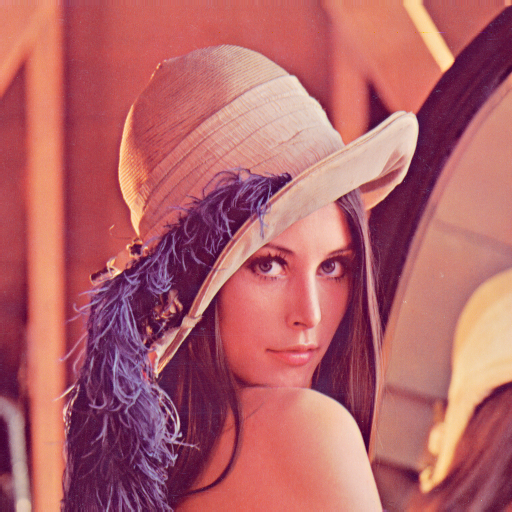

[125 137 226]
[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]]


In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
# Lena has 512 x 512 pixels and three channels 
print (I.shape)
cv2_imshow(I)

# Print the three channels showing the RGB intensities (0, 0) pixel
print(I[0][0][0:3])

# Print the three channels showing the RGB intensities of the first two rows of the first column
print(I[0:2][0:1])

Lena's Playboy photoshoot image is a standard test image widely used in the field of image processing since 1973! 

(137, 137, 3)


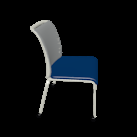

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png')
print (I.shape)
cv2_imshow(I)

### Alpha channel

Alpha channels in PNG images are masks through which you can display images. The alpha channel is an 8-bit channel, which means it has 256 levels of gray from 0 (black) to 255 (white)

Here, the image now only has the object, the white portion is actually transparent area.

`IMREAD_UNCHANGE` reads the image in the format it was saved and not RGB format which is default.


(137, 137, 4)


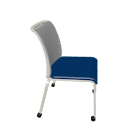

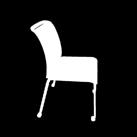

In [11]:
# Here the flag of the image has been set such that it is returned with the alpha channel
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)

# Show the alpha channel
cv2_imshow(I[:,:,3])

### NumPy Histogram


The Numpy histogram function doesn't draw the histogram, but it computes the occurrences of input data that fall within each bin.

`np.histogram(array, bins, range)`

Here, there are 
- 137 x 137  = 18769 pixels in the array

- Bins of 0 to 256. Each bin is a range.
  For example [0, 1, 2] is two bins [0, 1] and [1, 2] (NumPy style)

- Range of the pixels is [0, 256] (NumPy style).



(137, 137)


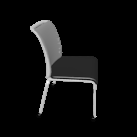

(18769,)
(256,)
(257,)


In [0]:
# Here a flag has been used to display the image in greyscale, now only one channel is needed
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_GRAYSCALE)
print (I.shape)
cv2_imshow(I)
# The ravel() function flattens the matrix int a one-D array of pixel values
counts,bins = np.histogram(I.ravel(), 256, [0, 256])
print(I.ravel().shape)
print(counts.shape)
print(bins.shape)

### Skimage 

*scikit-image* is another collection of algorithms for image processing and computer vision.

(137, 137, 4)


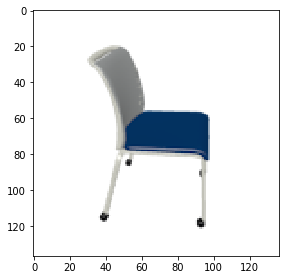

In [0]:
I = io.imread('/content/drive/My Drive/Image Processing/chair.png')
print(I.shape)
io.imshow(I)

### Matplotlib

Matplotlib only supports PNG images, and can be used to load and show images as well.



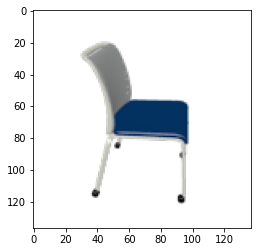

In [0]:
I = mpimg.imread('/content/drive/My Drive/Image Processing/chair.png')
plt.imshow(I)

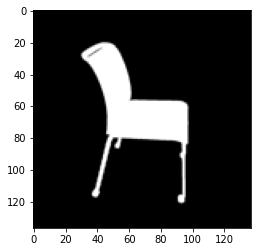

In [0]:
# Mask 
plt.imshow(I[:,:,3], cmap="gray")

### Intensity Transformations

### **Linear Shift**

***Excercise Question!*** 

Is this the correct way to transform?

In [13]:
I_lena_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
linear_shift = 45
lena_shifted_wrong = I_lena_bw + linear_shift
print(I_lena_bw.shape)
print(type(I_lena_bw[0][0]))

(512, 512)
<class 'numpy.uint8'>


This is wrong because the data type of every pixel element in the image matrix is $uint_8$ and hence the maximum value it can hold is 255.

Hence, adding excess to the value will cause an overflow in some cases, cause areas that should be close to pure white (~ 255) go to being close to pure black (~ 0)

### **NumPy Clip**

Given an interval, values outside the interval are clipped to the interval edges. 

`np.clip(array, minimum, maximum)`

### **NumPy Hstack**

Adds new columns.

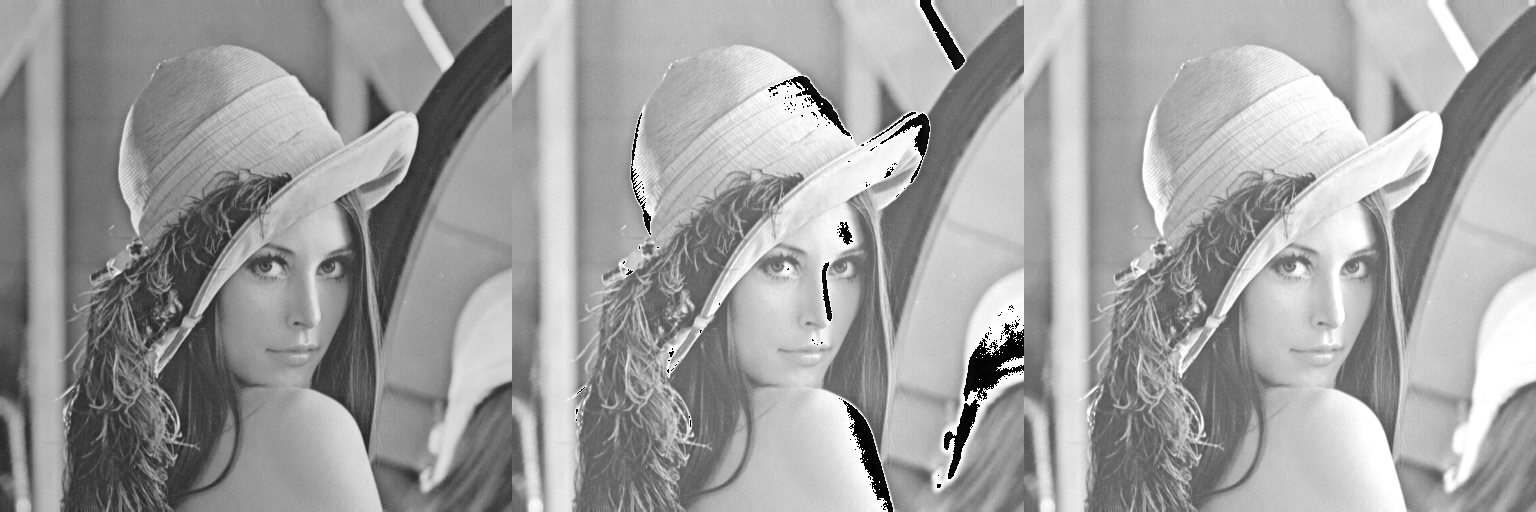

In [15]:
# Typecast the image pixels to integer from uint_8 as an integer has 4 bytes and will not have overflow
I = I_lena_bw.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I,lena_shifted_wrong, lena_shifted]))
# plt.imshow(np.hstack([I,lena_shifted_wrong, lena_shifted]), cmap="gray")


### Negative 

We want 0 to go to 255 and 255 to go to 0, 
can be done using 255 - I

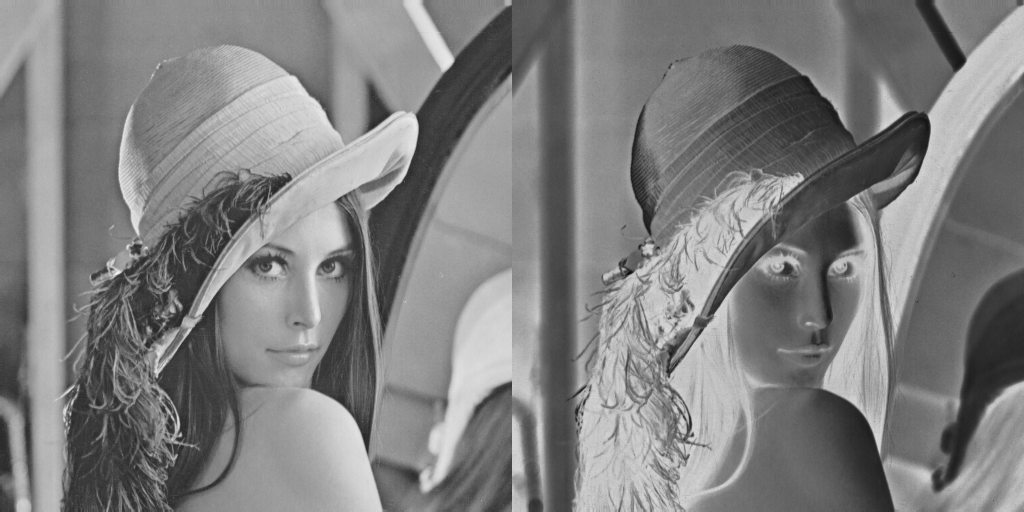

In [0]:
I = I_lena_bw
lena_shifted = np.clip((255 - I),0,255)
cv2_imshow(np.hstack([I,lena_shifted]))

### Log Transform



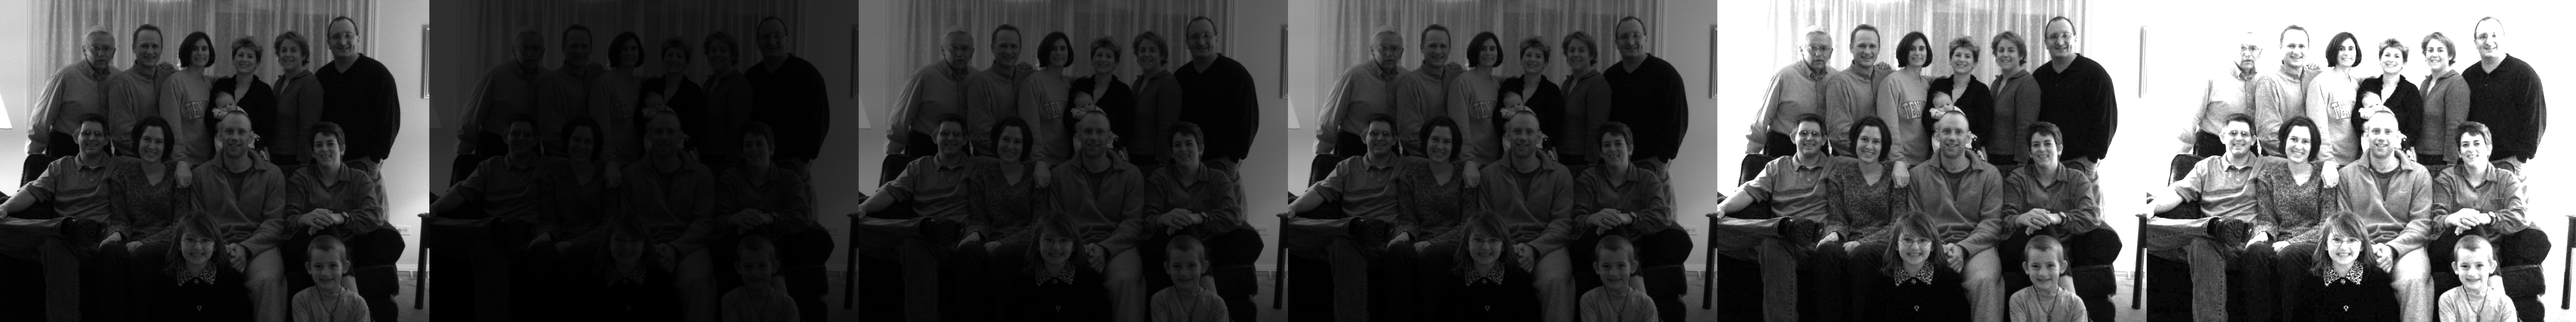

In [16]:
family_bw = cv2.imread('/content/drive/My Drive/Image Processing/gamma2.jpg', cv2.IMREAD_GRAYSCALE)
all_images = family_bw

def logarithm(I, c):
  global all_images
  I = I.astype("float32")
  logarithm_transform = np.clip((c * np.log((I/255) + 1))*255, 0, 255) 
  I = I.astype("uint8")
  all_images = np.hstack([all_images, logarithm_transform])

# Varying c
logarithm(family_bw, 0.3)
logarithm(family_bw, 0.7)
logarithm(family_bw, 1)
logarithm(family_bw, 2.5)
logarithm(family_bw, 5)
cv2_imshow(all_images)
# plt.imshow(all_images, cmap="gray")

### Power Law Transformation

***Excercise Question!***

Experiment with different values of $\gamma$


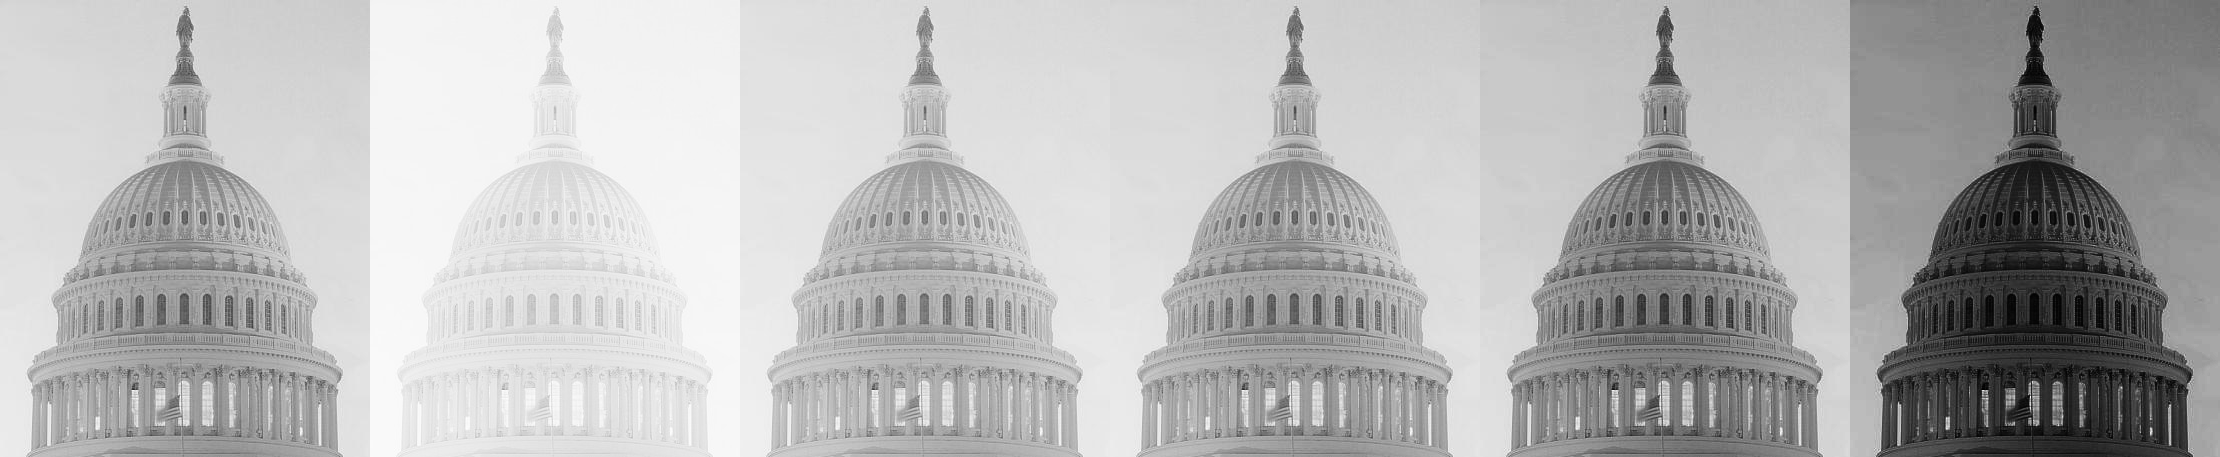

In [17]:
minar_bw = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg', cv2.IMREAD_GRAYSCALE)
all_images = minar_bw

def power(I, c, gamma):
  global all_images
  I = I.astype("float32")
  power_transform = np.clip((c * ((I/255)**gamma))*255, 0, 255) 
  I = I.astype("uint8")
  all_images = np.hstack([all_images, power_transform])

# Varying gamma
power(minar_bw, 1, 0.25)
power(minar_bw, 1, 0.75)
power(minar_bw, 1, 1)
power(minar_bw, 1, 1.5)
power(minar_bw, 1, 3.5)
cv2_imshow(all_images)
# plt.imshow(all_images, cmap="gray")

### Histograms For Grayscale Images

### **Brute Force Looping**

Text(0.5, 1.0, 'Image Histogram (Grayscale)')

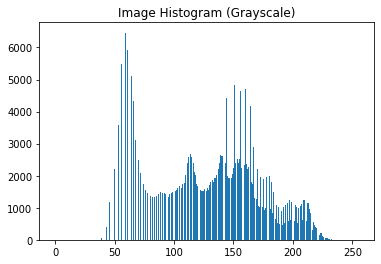

In [0]:
I_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
# All 256 bins have a count of 0
count = [0 for i in range(256)]
for i in I_bw.flatten():
    count[i] += 1

plt.bar(range(256),np.array(count))
plt.title("Image Histogram (Grayscale)")

### **Using Magical Plotting Libraries**


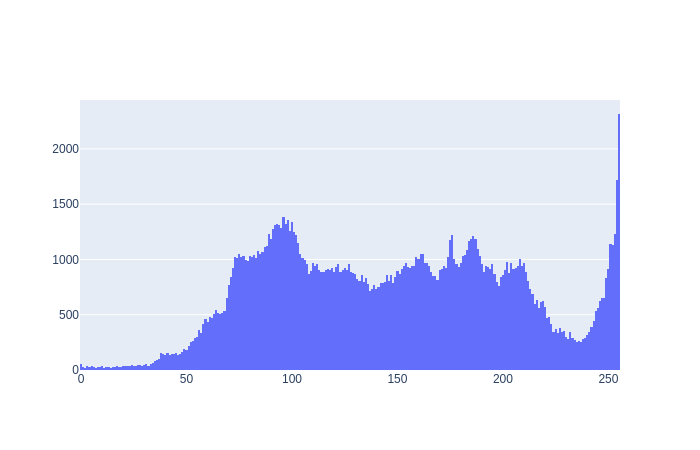

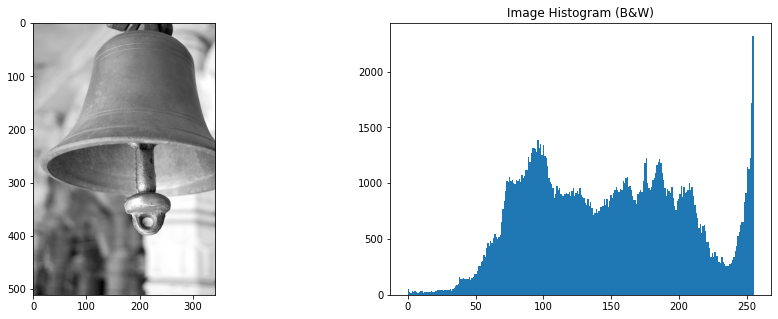

In [19]:
def mplib_hist(I):
    plt.hist(I.flatten(), bins=256)
    plt.title("Image Histogram (B&W)")
    
def plotly_hist(I):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x = I.ravel()))
    fig.show("png")

I_bw = cv2.imread('/content/drive/My Drive/Image Processing/bell.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (15,5))
# Create a 2 x 1 grid and select first plot
plt.subplot(121) 
plt.imshow(cv2.cvtColor(I_bw, cv2.COLOR_RGB2BGR))
# Select second plot
plt.subplot(122)
mplib_hist(I_bw)

plotly_hist(I_bw)

uint8


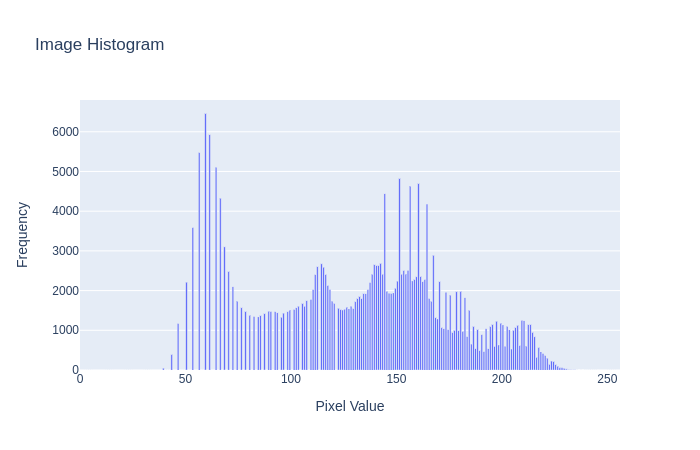

In [0]:
I_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
print (I_bw.dtype)
counts,bins = np.histogram(I_bw.ravel(), 256, [0,256])

# This statement is the summing trick that daddy had taught
# Remove the last element and the first element and then add and half to get the bin values corrsponding to index
bins = 0.5 * (bins[:-1] + bins[1:])

# Using plotly express
fig = px.bar(x=bins, 
             y=counts,
             labels={'x':'Pixel Value', 'y':'Frequency'},
             title='Image Histogram')
fig.show("png")


### Histograms Of Colours

### **Using Plotting Libraries**

In [0]:
def mplib_color(img):
    plt.title("Histogram (RGB)")
    plt.hist(img[:,:,0].ravel(), bins = 256, color="red", alpha = 0.6)
    plt.hist(img[:,:,1].ravel(), bins = 256, color="green", alpha = 0.6)
    plt.hist(img[:,:,2].ravel(), bins = 256, color="blue", alpha = 0.6)
    plt.show()
    
def plotly_color(img):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=I[:,:,0].ravel(),
                               name="Red", marker_color='red'))
    fig.add_trace(go.Histogram(x = I[:,:,1].ravel(),
                               name="Green", marker_color='green'))
    fig.add_trace(go.Histogram(x = I[:,:,2].ravel(),
                               name="Blue", marker_color='blue'))
    fig.show("png")

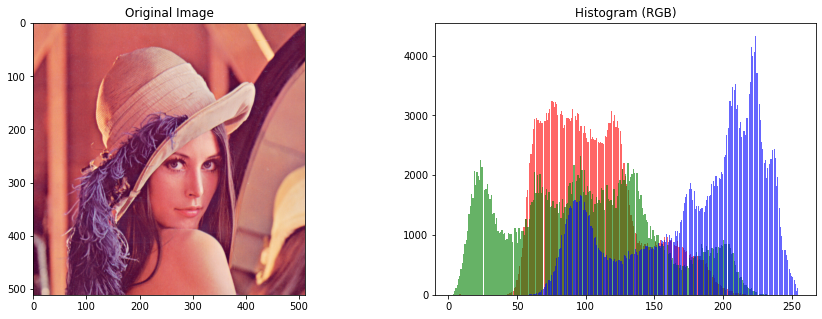

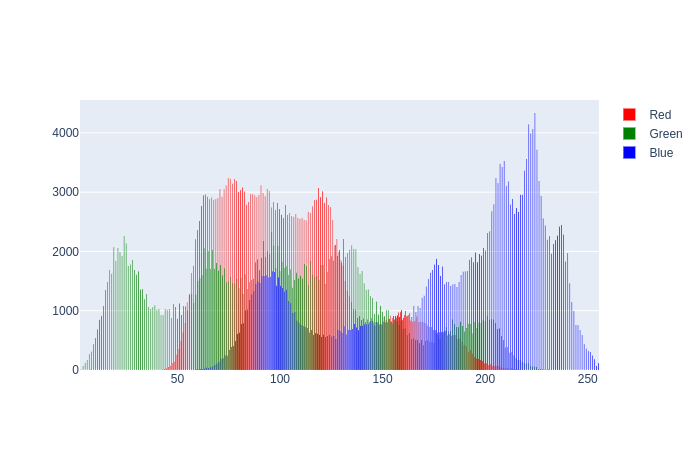

In [0]:
I_colour = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')

fig = plt.figure(figsize = (15,5))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(I_colour, cv2.COLOR_RGB2BGR))
plt.subplot(122)

mplib_color(I_colour)
plotly_color(I_colour)

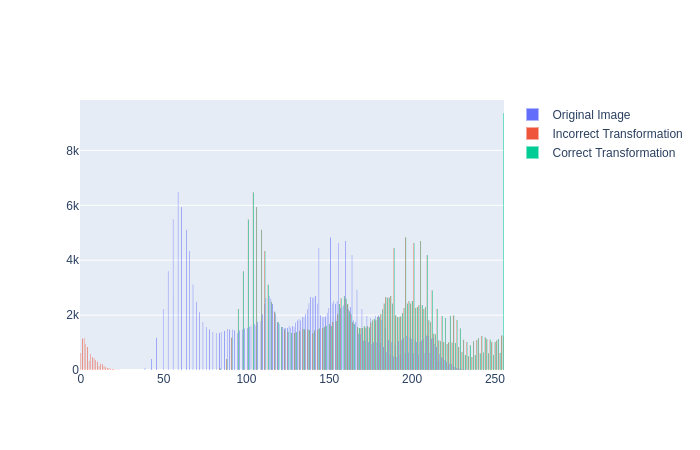

In [0]:
 # Displaying the transformed image matrices of shifted Lena
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), 
                           name= 'Original Image'))
fig.add_trace(go.Histogram(x=lena_shifted_wrong.ravel(), 
                           name= 'Incorrect Transformation'))
fig.add_trace(go.Histogram(x=lena_shifted.ravel(), 
                           name= 'Correct Transformation'))
fig.show("png")

***Excercise!***

Function to return the histogram in plotly colour.

In [0]:
def return_histogram(I):
  if (len(I.shape) == 2 or I.shape[2] == 1):
    counts,bins = np.histogram(I.ravel(),256,[0,256])
    bins = 0.5 * (bins[:-1] + bins[1:])
    fig = px.bar(x=bins, y=counts, labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
  elif (I.shape[2] == 3):
    # Complete this part for RGB images
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=I[:,:,0].ravel(),
                               name="Red", marker_color='red'))
    fig.add_trace(go.Histogram(x = I[:,:,1].ravel(),
                               name="Green", marker_color='green'))
    fig.add_trace(go.Histogram(x = I[:,:,2].ravel(),
                               name="Blue", marker_color='blue'))
  return fig




### Contrast Stetching

Both manual and CV function have been used in the code below.

Text(0.5, 1.0, 'Histogram')

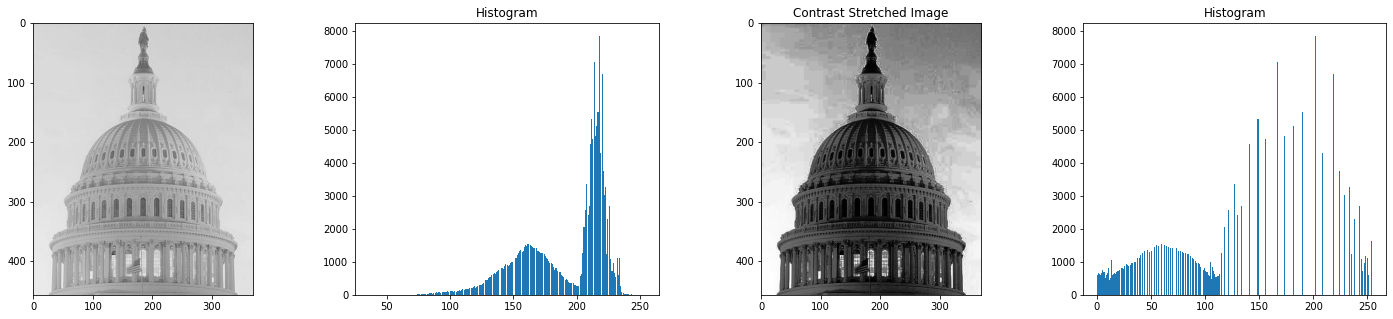

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(25,5))
plt.subplot(141)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_RGB2BGR))
plt.subplot(142)
mplib_hist(I)
plt.title("Histogram")

# Using a fancy function
I_contrast = cv2.equalizeHist(I)

# Manual
hist,bins = np.histogram(I.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
I_contrast = cdf[I]

plt.subplot(143)
plt.imshow(cv2.cvtColor(I_contrast, cv2.COLOR_RGB2BGR))
plt.title("Contrast Stretched Image")
plt.subplot(144)
mplib_hist(I_contrast)
plt.title("Histogram")

### Image Thresholding

### **Manual Binary Thresholding Using Histogram**

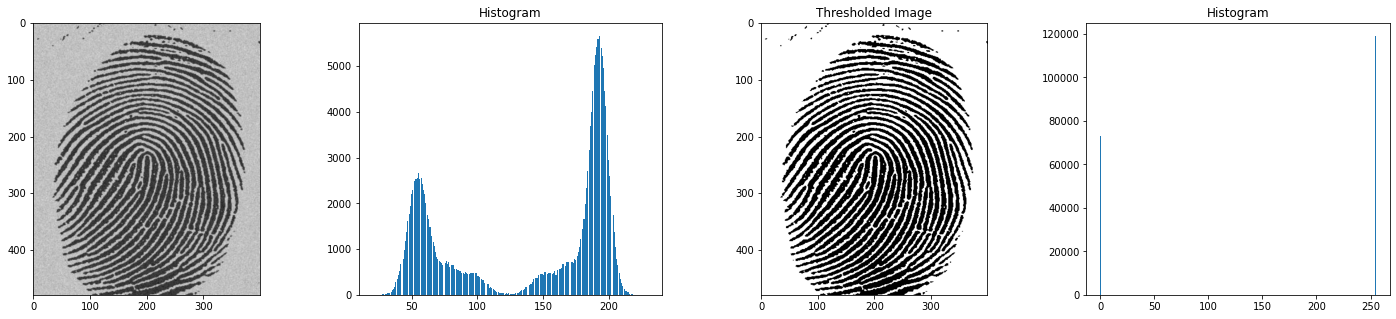

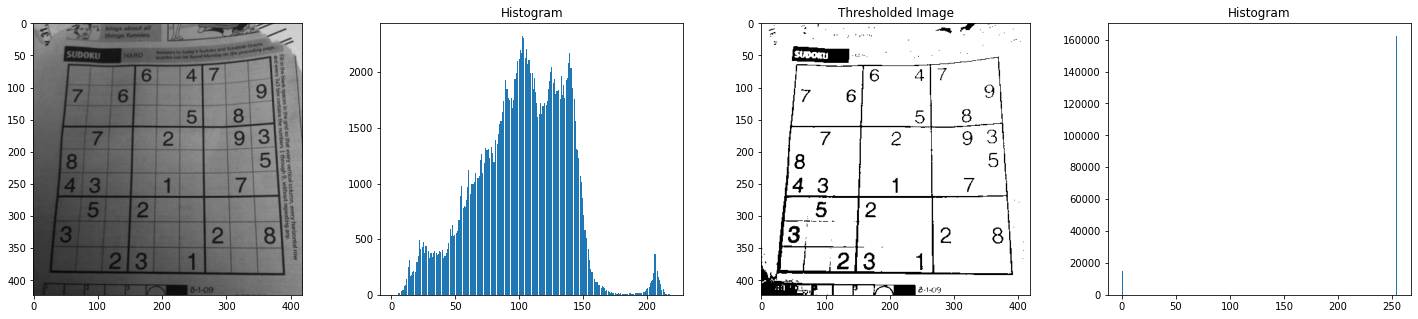

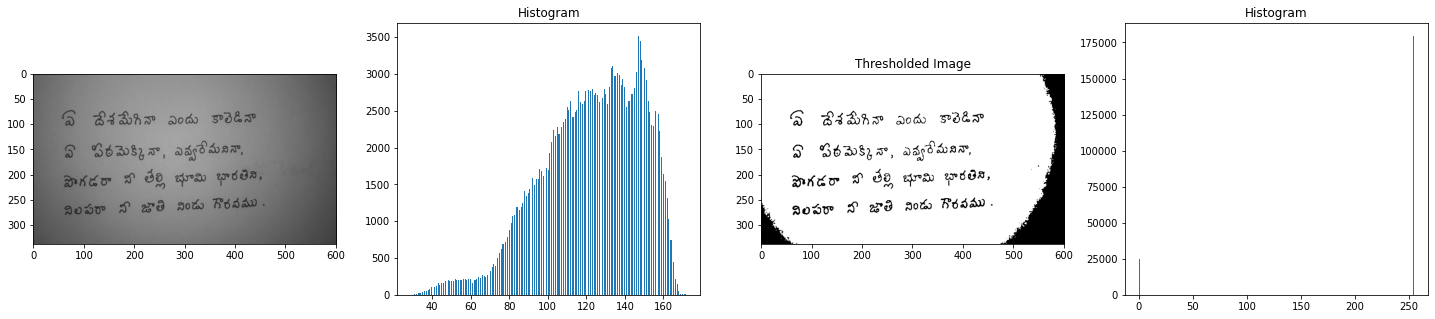

In [0]:
def threshold(I, a):
    return ((I > a) * 255).astype('uint8')


def binary(I,a):
  fig = plt.figure(figsize=(25,5))
  plt.subplot(141)
  plt.imshow(cv2.cvtColor(I, cv2.COLOR_RGB2BGR))
  plt.subplot(142)
  mplib_hist(I)
  plt.title("Histogram")
  plt.subplot(143)
  plt.imshow(cv2.cvtColor(threshold(I, a), cv2.COLOR_RGB2BGR))
  plt.title("Thresholded Image")
  plt.subplot(144)
  mplib_hist(threshold(I, a))
  plt.title("Histogram")
  plt.show()

imgOne = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
binary(imgOne, 125)
imgTwo = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
binary(imgTwo, 50)
imgThree = cv2.imread('/content/drive/My Drive/Image Processing/text.jpg', cv2.IMREAD_GRAYSCALE)
binary(imgThree, 90)

### **Binary Thresholding Using Library Functions**

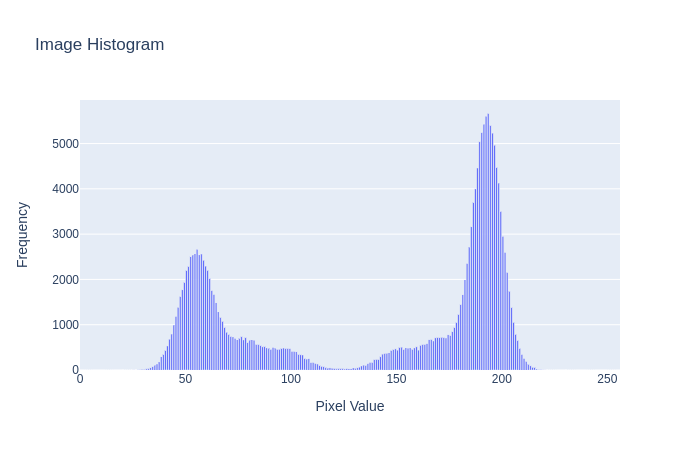

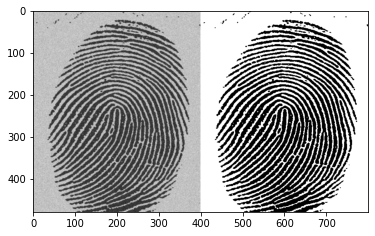

In [0]:
# Thresholding based on Histogram Values
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show("png")
ret, thresh = cv2.threshold(I, 125, 255, cv2.THRESH_BINARY)
# cv2_imshow(np.hstack([I, thresh]))
plt.imshow(np.hstack([I, thresh]), cmap="gray")

### Adaptive Thresholding

In the Sudoku image case as we see global thresholding does not work. Hence we use adaptive thresholding where separate threshold is defined for each pixel based on the neighbouring window around it.

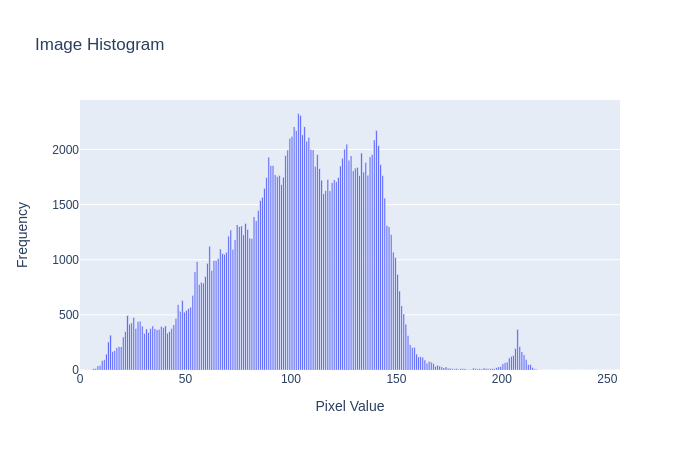

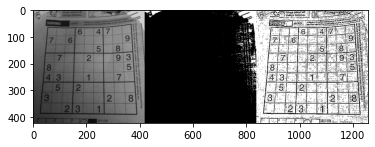

In [0]:
# Adaptive Thresholding
I = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show("png")
ret,thresh1 = cv2.threshold(I, 150, 255, cv2.THRESH_BINARY)

# Window is decided by a gaussian function 
thresh2 = cv2.adaptiveThreshold(I, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
# cv2_imshow(np.hstack([I, thresh1, thresh2])) 
plt.imshow(np.hstack([I, thresh1, thresh2]), cmap="gray")

### Convolution / Filtering

***What will be the identity kernel?***

The 3 x 3 no-effect kernel would be,
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 
\end{bmatrix}

Text(0.5, 1.0, 'On BLuring Five Times')

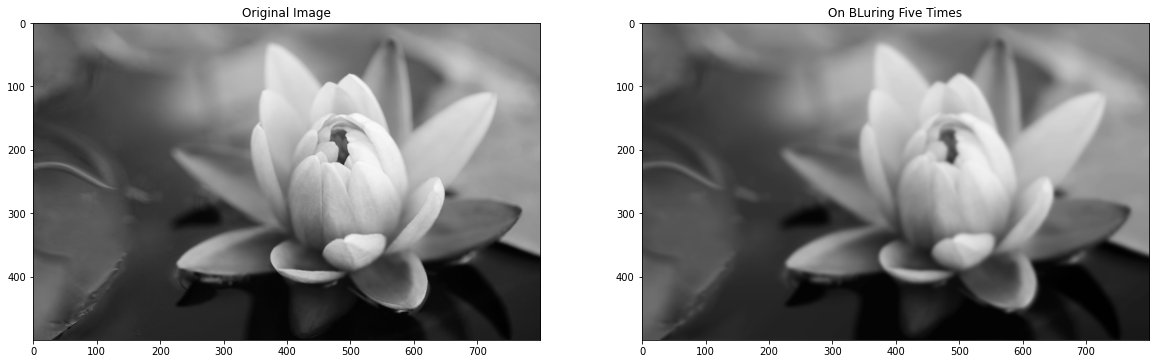

In [21]:
def convolution(H, img, x, y):  
    pixel = 0;
    for i in range(-1,2):
        for j in range(-1,2):
            pixel += H[i + 1][j + 1] * img[x + i][y + j]
    return pixel

def applyFilter(img, H):
  a, b = img.shape
  for i in range(a):
    for j in range(b):
      if (i in [0,a-1] or j in [0, b-1]):
        continue
      else:
        img[i][j] = convolution(H, img, i, j)        
  return img




H = np.array([[1,1,1],[1,1,1],[1,1,1]])/9


img_bw = cv2.imread("/content/drive/My Drive/Image Processing/lotus.jpg", cv2.IMREAD_GRAYSCALE)
newImg = cv2.imread("/content/drive/My Drive/Image Processing/lotus.jpg", cv2.IMREAD_GRAYSCALE) 
newImg = applyFilter(newImg, H)
newImg = applyFilter(newImg, H)
newImg = applyFilter(newImg, H)
newImg = applyFilter(newImg, H)
newImg = applyFilter(newImg, H)

fig = plt.figure(figsize = (20,90))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_RGB2BGR))
plt.title("Original Image")
plt.subplot(122)
plt.imshow(cv2.cvtColor(newImg, cv2.COLOR_RGB2BGR))
plt.title("On BLuring Five Times")

As can be seen, on repeatedly applying the amoothing filter the image becomes more and more blur.

### Image Filtering Using Libraries

### Smoothing

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


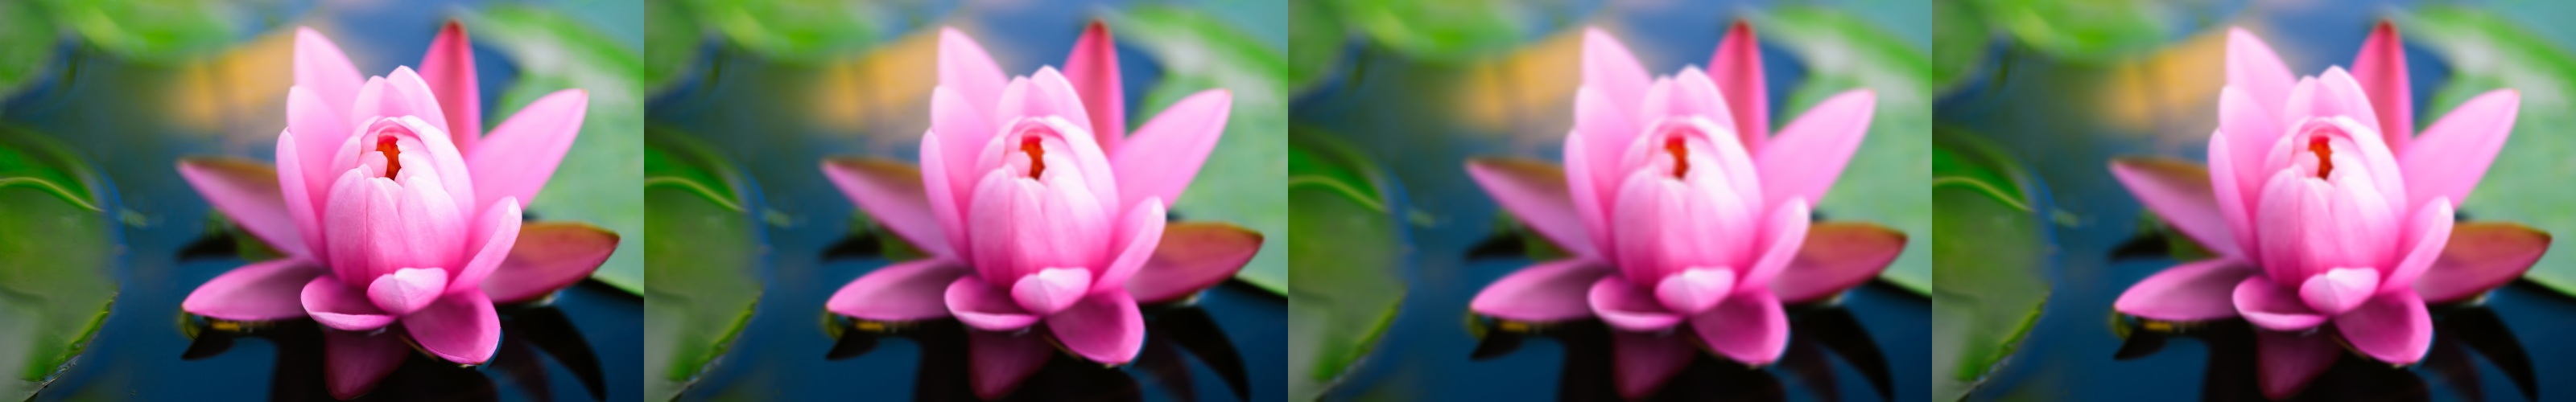

In [24]:
# Averaging or Smoothing Filter
I = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')

# Averaging Kernel of size (5,5)
kernel = np.ones((5,5),np.float32)/25
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)

# Averaging Kernel of size (9,9)
filtered_image2 = cv2.blur(I,(9,9),0)

# Gausssian filter
filtered_image3 = cv2.GaussianBlur(I,(9,9),0)


cv2_imshow(np.hstack([I, filtered_image1, filtered_image2,filtered_image3]))
# figure = return_histogram(I)
# figure.show()

### Sharpening

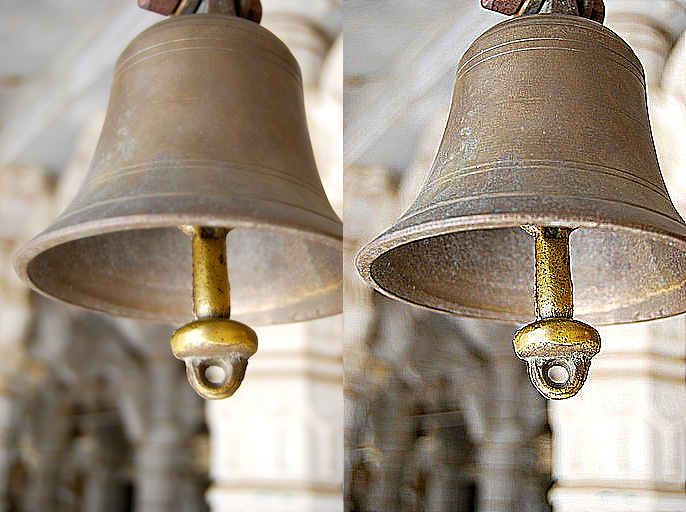

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/bell.jpg')
sharpening_kernel = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened_image = cv2.filter2D(I,-1,sharpening_kernel)
cv2_imshow(np.hstack([I, sharpened_image]))

### Edge Detection Filters 

### **Sobel Filter**

(187, 221)
Sobel operator along x
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel operator along y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


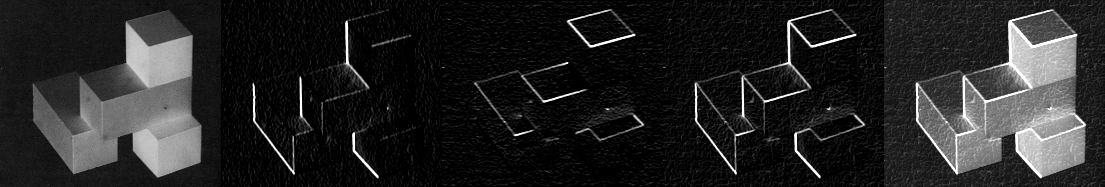

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/cubes.png', cv2.IMREAD_GRAYSCALE)
print (I.shape)

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
print ('Sobel operator along x')
print (sobel_x)
filtered_image1 = cv2.filter2D(I, -1, sobel_x)

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
print ('Sobel operator along y')
print (sobel_y)
filtered_image2 = cv2.filter2D(I,-1,sobel_y)


magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2, magnitude, final]))

***Excercise Question!***

Count the number of windoes in the image using edge detection/ enhancement.


In [0]:
# Complete this

## Salt and Pepper Noise
Salt noise is characterised by white pixels all over the image and pepper noise is characterised by black pixels spread over the image.




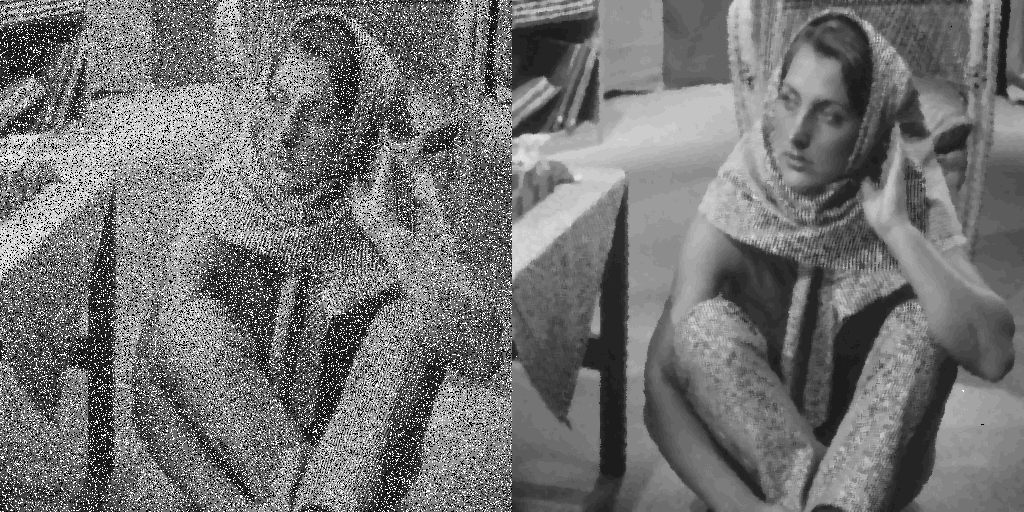

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/salt_noise.png')
median = cv2.medianBlur(I,5)
cv2_imshow(np.hstack([I,median]))